In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

import os, glob, inspect, sys


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

# Simulated data

This data was simulated based on the observed data. 1000 replicates were drawn from a normal distribution based on the observed mean and standard deviation of features. This analysis is meant to give an idea of how the uncertainty of the data affects the ability to identift the different microstructures.

# Import data

In [2]:
data_path = "../../Data/Merged_data"
df = pd.read_csv(os.path.join(data_path, 'ALL_TUBE_PIPE_simulated.csv'), 
                 index_col=0)
df.head(20)

,TEP_mean_uV_C,Absorption_avg_500,backscatter_avg,Absorption_avg_50,A,B,p,Absorption_avg_100,Absorption_avg_200,median_CF,median_perm,median_MBN
Condition,,,,,,,,,,,,
T_B1,13.059389,0.000223,0.018264,0.001092,-3.169593e-07,0.000808,0.198277,0.000469,0.000300,1.114112,67.853503,0.632442
T_B1,12.857076,0.000227,0.016573,0.002256,7.757837e-07,0.000795,0.243065,0.000666,0.000488,1.097555,68.923871,0.439416
T_B1,12.933789,0.000231,0.013513,0.000792,4.116799e-07,0.000979,0.168739,0.000398,0.000370,1.100158,66.787739,0.428069
T_B1,12.909335,0.000257,0.014531,0.001572,-2.818840e-07,0.000711,0.219011,0.000817,0.000218,1.092135,71.420940,0.267911
T_B1,12.813608,0.000202,0.016312,0.001277,-3.135979e-07,0.000976,0.188611,0.000534,0.000283,1.111787,67.395337,0.277365
T_B1,12.949379,0.000258,0.017260,0.000726,-4.033371e-07,0.000894,0.186212,0.000618,0.000319,1.106441,67.532795,0.514678
T_B1,12.884992,0.000218,0.018014,0.001162,-6.116756e-07,0.000839,0.194037,0.000807,0.000333,1.108371,69.282400,0.347480
T_B1,12.922830,0.000210,0.016762,0.001760,1.525843e-07,0.000796,0.198758,0.000725,0.000560,1.096658,67.916509,0.422654
T_B1,12.924759,0.000223,0.020965,0.001069,-2.786324e-07,0.001126,0.198320,0.000856,0.000319,1.083156,67.678605,0.571845


## Calculating new values

There were some errors calculating the AUC value so for now the parameters are just dropped.

In [3]:
df['AUC_avg'] = mc.findAUC(df, A=df['A'], B=df['B'], p=df['p'], name='AUC_avg')
df.drop(columns=["A","B","p"],inplace=True)

## Scaling values

In [4]:
df_known = df.iloc[8000:,]
scaled_df = mc.scale_general(df_known, MinMaxScaler())[0]


## Plot PCA

To see what the uncertainty of the data looks like in terms of their distribution, principal component analysis was done with the simulated data and the first two components wer plotted. First this is done for the known tubes.

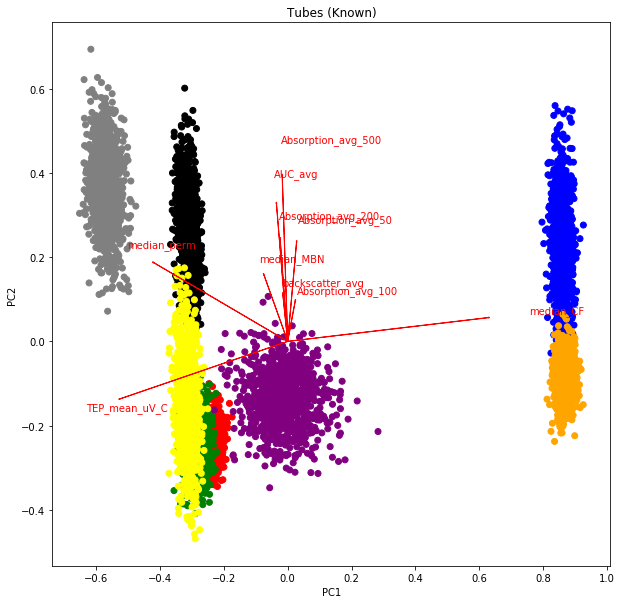

In [5]:
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(scaled_df)

color_dict = { 'T_AR':'red', 'T_N':'blue', 'T_N_T':'black', 'T_T':'green','T_OT':'purple',
             'T_FF':'grey', 'T_HAZ':'orange', 'T_HAZ_T':'yellow' }

mc.biplot(pca, scaled_df, 0, 1, "Tubes (Known)", color_dict)

Next we repeat for the unknown tubes. Since we're doing the PCA again it's possible that the components change but the variation should generally be in similar features and it should give us a general indication. In fact, the first two components look extremely similar and from this there seems to be 3 samples that cannot be told apart, but there are possible identifications for the others. Of the blind microstructure samples that were identified based on a single measurement in the previous reports, 4 are identified using this method, 1 additional sample is potentially identified, and one previously identified sample could not be identified. But is should be noted that this is based on the first two principal components alone so a full  model would presuably have more power.

In agreement with previous reports:
* FF=B7
* OT=B8
* N=B4
* HAZ=B6

Identified in previous report but not here:
* AR=B5

Identified here but not in previous reports:
* N_T=B2

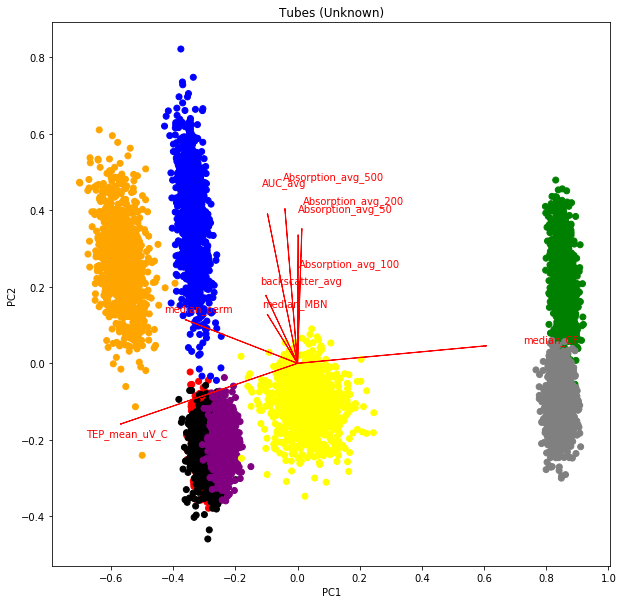

In [6]:
df_unknown = df.iloc[:8000,]
scaled_df = mc.scale_general(df_unknown, MinMaxScaler())[0]

pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(scaled_df)

color_dict = { 'T_B1':'red', 'T_B2':'blue', 'T_B3':'black', 'T_B4':'green','T_B5':'purple',
             'T_B6':'grey', 'T_B7':'orange', 'T_B8':'yellow' }

mc.biplot(pca, scaled_df, 0, 1, "Tubes (Unknown)", color_dict)